# AIML CA2 PART B

#

# Project Done By : 
## Tan Eu Zin
## P2415927
## DAAA/FT/1B/03

#

# Background : 
*We collected the information of 200 customers including their Gender, Age, Income 
and How much they spend. W  want to group the customers into clusters so that w 
can cater needs for different customer*.*

#

# IMPORTS

In [104]:
# import libraries
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# import clustering models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

#

# LOADING DATA

In [105]:
# import required dataset
dataset = pd.read_csv('CA2-Customer-Data.csv') 

#

# OBSERVING DATASET

In [106]:
# viewing dataset info 
print('Dataset info : ')
dataset.info()

Dataset info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [107]:
# viewing dataset size 
print('Amount of data (rows x columns) : ', dataset.shape)

Amount of data (rows x columns) :  (200, 5)


In [108]:
# display dataset statistics 
dataset.describe()

CustomerID         Age  Income (k$)  How Much They Spend
count  200.000000  200.000000   200.000000           200.000000
mean   100.500000   38.850000    60.560000            50.200000
std     57.879185   13.969007    26.264721            25.823522
min      1.000000   18.000000    15.000000             1.000000
25%     50.750000   28.750000    41.500000            34.750000
50%    100.500000   36.000000    61.500000            50.000000
75%    150.250000   49.000000    78.000000            73.000000
max    200.000000   70.000000   137.000000            99.000000

In [109]:
# checking first 5 rows of dataset 
dataset.head()

CustomerID  Gender  Age  Income (k$)  How Much They Spend
0           1    Male   19           15                   39
1           2    Male   21           15                   81
2           3  Female   20           16                    6
3           4  Female   23           16                   77
4           5  Female   31           17                   40

In [110]:
# checking for missing values 
dataset.isnull().sum()
# no need to deal with missing data

CustomerID             0
Gender                 0
Age                    0
Income (k$)            0
How Much They Spend    0
dtype: int64

#

# PLOTTING GRAPHS TO OBSERVE DATASET

In [111]:
# set global figure size to 12 x 6 inches
plt.rcParams['figure.figsize'] = [12, 6] 

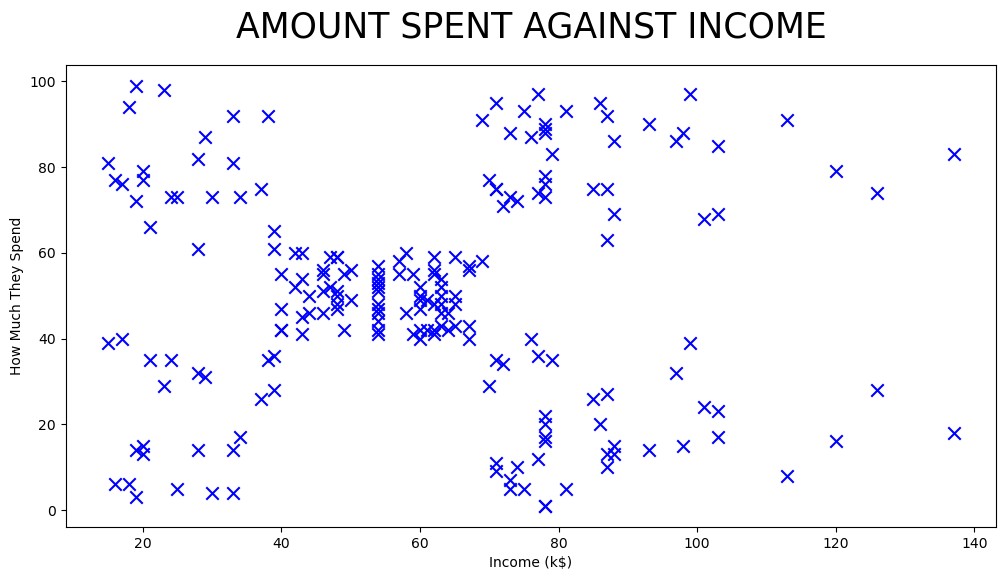

In [112]:
# amount of money spent against income
plt.scatter(dataset['Income (k$)'], dataset['How Much They Spend'], s=80, color='blue', marker='x')
plt.title('AMOUNT SPENT AGAINST INCOME', pad=20, fontsize=25)
plt.xlabel('Income (k$)')
plt.ylabel('How Much They Spend')
plt.show()
# no clear relation observed except for an obvious cluster in the middle and another 4 in each corner

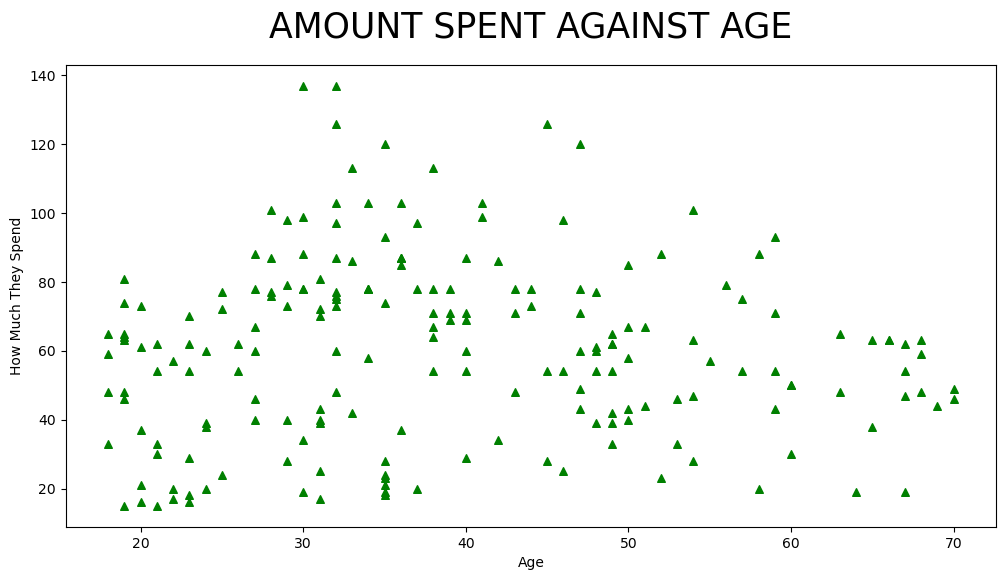

In [113]:
# amount of money spent against age
plt.scatter(dataset['Age'], dataset['Income (k$)'], s=30, color='green', marker='^')
plt.title('AMOUNT SPENT AGAINST AGE', pad=20, fontsize=25)
plt.xlabel('Age')
plt.ylabel('How Much They Spend')
plt.show()
# no clear obvious relation and no clear obvious clusters

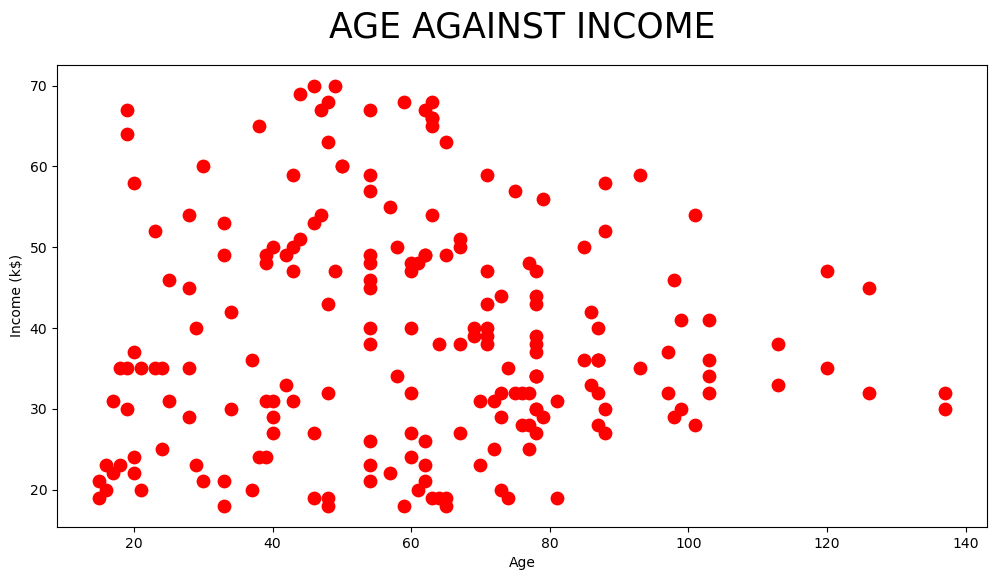

In [114]:
# amount of money spent against income
plt.scatter(dataset['Income (k$)'], dataset['Age'], s=80, color='r')
plt.title('AGE AGAINST INCOME', pad=20, fontsize=25)
plt.xlabel('Age')
plt.ylabel('Income (k$)')
plt.show()
# no clear relation observed and no obvious clusters observed

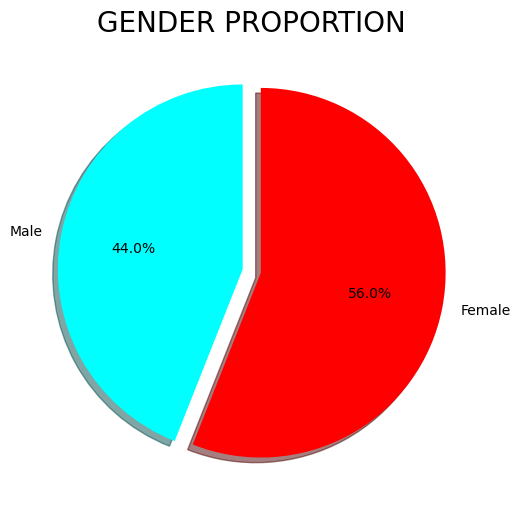

In [115]:
# pie chart of gender proportion 

# preparing data
male_count = (dataset['Gender'] == 'Male').sum() # counts no. of males
female_count = (dataset['Gender'] == 'Female').sum() # counts no. of females
genders = [male_count, female_count] 

# plotting the pie chart
plt.title('GENDER PROPORTION', fontsize=20)
plt.pie(genders, labels=('Male','Female'), autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05, 0.05), colors=('cyan', 'red'))
plt.show()

# about 12.0% more females than males

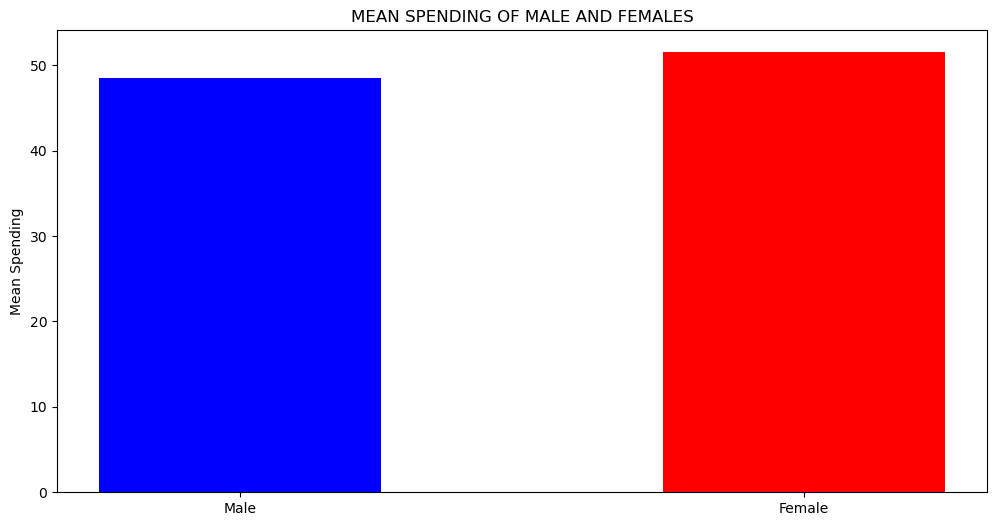

In [116]:
# bar plot for mean spending of each gender

# calculating mean spending for each gender
m_med = dataset[dataset['Gender'] == 'Male']['How Much They Spend'].mean()
f_med = dataset[dataset['Gender'] == 'Female']['How Much They Spend'].mean()

# plotting the bar plot
plt.bar(['Male', 'Female'], [m_med, f_med], color=['blue', 'red'], width=0.5)
plt.title('MEAN SPENDING OF MALE AND FEMALES')
plt.ylabel('Mean Spending')
plt.show()

# females generally spend more

#

# PREPARING DATA FOR USE

In [117]:
# view data 
print('Data with unwanted column(s) :\n')
print(dataset.head())

# remove unwanted column : CustomerID --> customer id is only for labelling count of rows of data, does not affect data
# remove unwanted column : Gender --> Clustering visualisations will not show anything related to gender, and mainly focuses on other numerical data
dataset.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

# check head to verify unwanted column has been removed
print('\nData after removing unwanted columns :\n')
print(dataset.head())

Data with unwanted column(s) :

   CustomerID  Gender  Age  Income (k$)  How Much They Spend
0           1    Male   19           15                   39
1           2    Male   21           15                   81
2           3  Female   20           16                    6
3           4  Female   23           16                   77
4           5  Female   31           17                   40

Data after removing unwanted columns :

   Age  Income (k$)  How Much They Spend
0   19           15                   39
1   21           15                   81
2   20           16                    6
3   23           16                   77
4   31           17                   40


In [118]:
# rename columns to shorten name of columns 

dataset.columns = ['Age', 'Income', 'Amount Spent']
dataset.head()

# now data has been cleaned and prepped for use!

Age  Income  Amount Spent
0   19      15            39
1   21      15            81
2   20      16             6
3   23      16            77
4   31      17            40

#

# FEATURE SCALING (Z-SCORE STANDADIZATION)

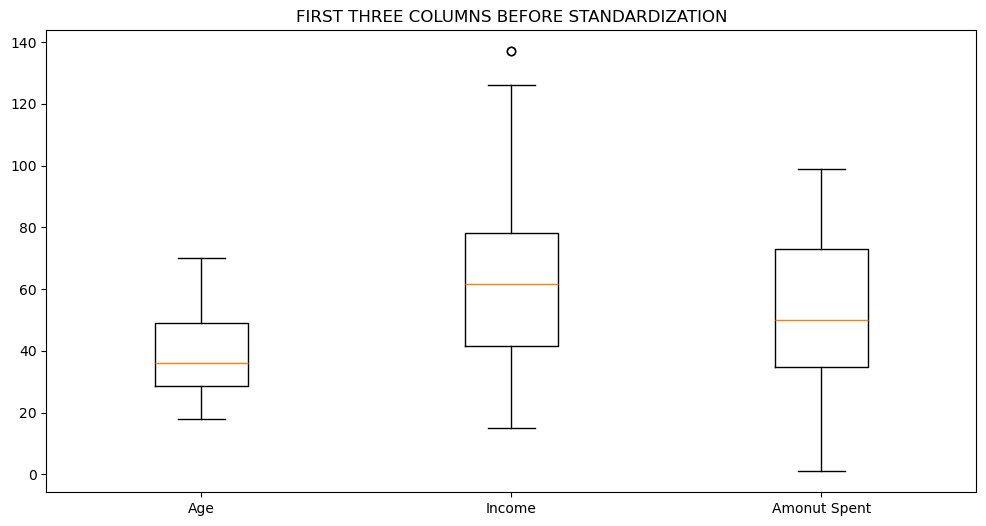

In [119]:
# before z-score standardization
plt.title('FIRST THREE COLUMNS BEFORE STANDARDIZATION')
plt.boxplot(dataset[['Age', 'Income', 'Amount Spent']], labels=['Age', 'Income', 'Amonut Spent'])
plt.show()

In [120]:
# carrying out z-score standardization on the three columns of data
std_scaler = StandardScaler()
dataset[['Age', 'Income', 'Amount Spent']] = std_scaler.fit_transform(dataset[['Age', 'Income', 'Amount Spent']])

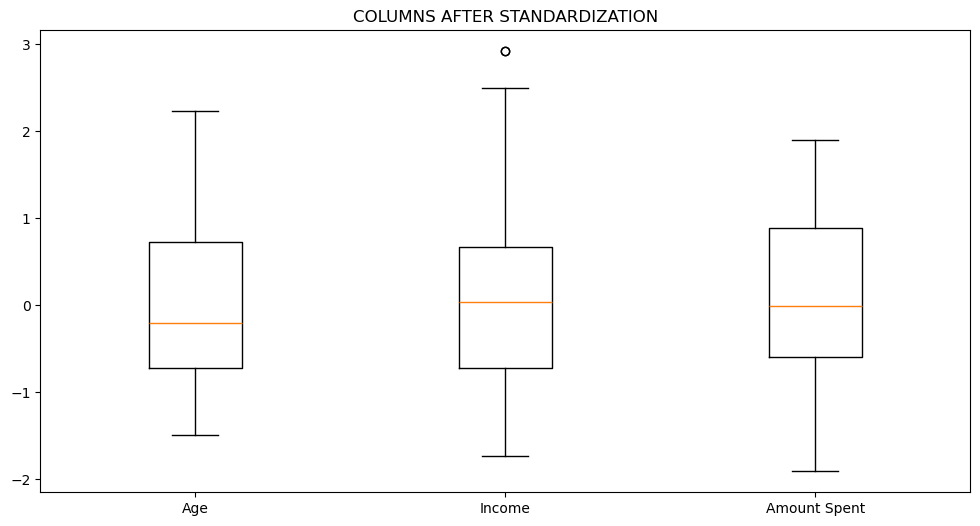

In [121]:
# after z-score standardization 
plt.title('COLUMNS AFTER STANDARDIZATION')
plt.boxplot(dataset[['Age', 'Income', 'Amount Spent']], labels=['Age', 'Income', 'Amount Spent'])
plt.show()
# view that data has successfully been scaled

#

# Dimensionality Reduction
*Neither PCA and LDA can be used as dimensionality reduction is not needed. Since there are only 3 features in the dataset : Age, Income, Amount Spent, there is no need for feature extraction with the low-dimensional data using PCA. For LDA, since this is an unsupervised clustering problem, data is not labelled hence LDA cannot be used as it requires labelled data.*

#

# Data before clustering

<Figure size 1000x1000 with 0 Axes>

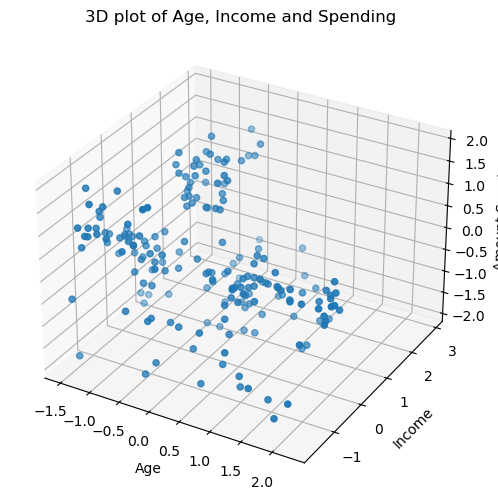

In [122]:
# 3d plot

# figsize
fig = plt.figure(figsize=(10, 10))

# fig-plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# defining x y and z 
x1 = dataset['Age']
x2 = dataset['Income']
x3 = dataset['Amount Spent']

# x  ,y  ,z
ax.scatter(x1 , x2 , x3)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Amount Spent')
plt.title('3D plot of Age, Income and Spending')
plt.show()

#

# CLUSTERING MODELS

In [123]:
# k means : 
# Excellent starting point. Simple, efficient, and widely used. Good for finding distinct, non-overlapping clusters.   
# 
# gmm :
# A good alternative to k-means, especially if customer segments might overlap or have different shapes/densities. More flexible than k-means.   
# 
# hierarchical clustering :
# Useful for exploring potential hierarchical relationships between customer segments. 

#

# K-MEANs

#

# K-MEANS --> INCOME AGAINST AGE

For n_clusters=2, The Silhouette Coefficient is 0.335
For n_clusters=3, The Silhouette Coefficient is 0.350
For n_clusters=4, The Silhouette Coefficient is 0.404
For n_clusters=5, The Silhouette Coefficient is 0.410
For n_clusters=6, The Silhouette Coefficient is 0.427
For n_clusters=7, The Silhouette Coefficient is 0.403
For n_clusters=8, The Silhouette Coefficient is 0.379
For n_clusters=9, The Silhouette Coefficient is 0.375
For n_clusters=10, The Silhouette Coefficient is 0.388


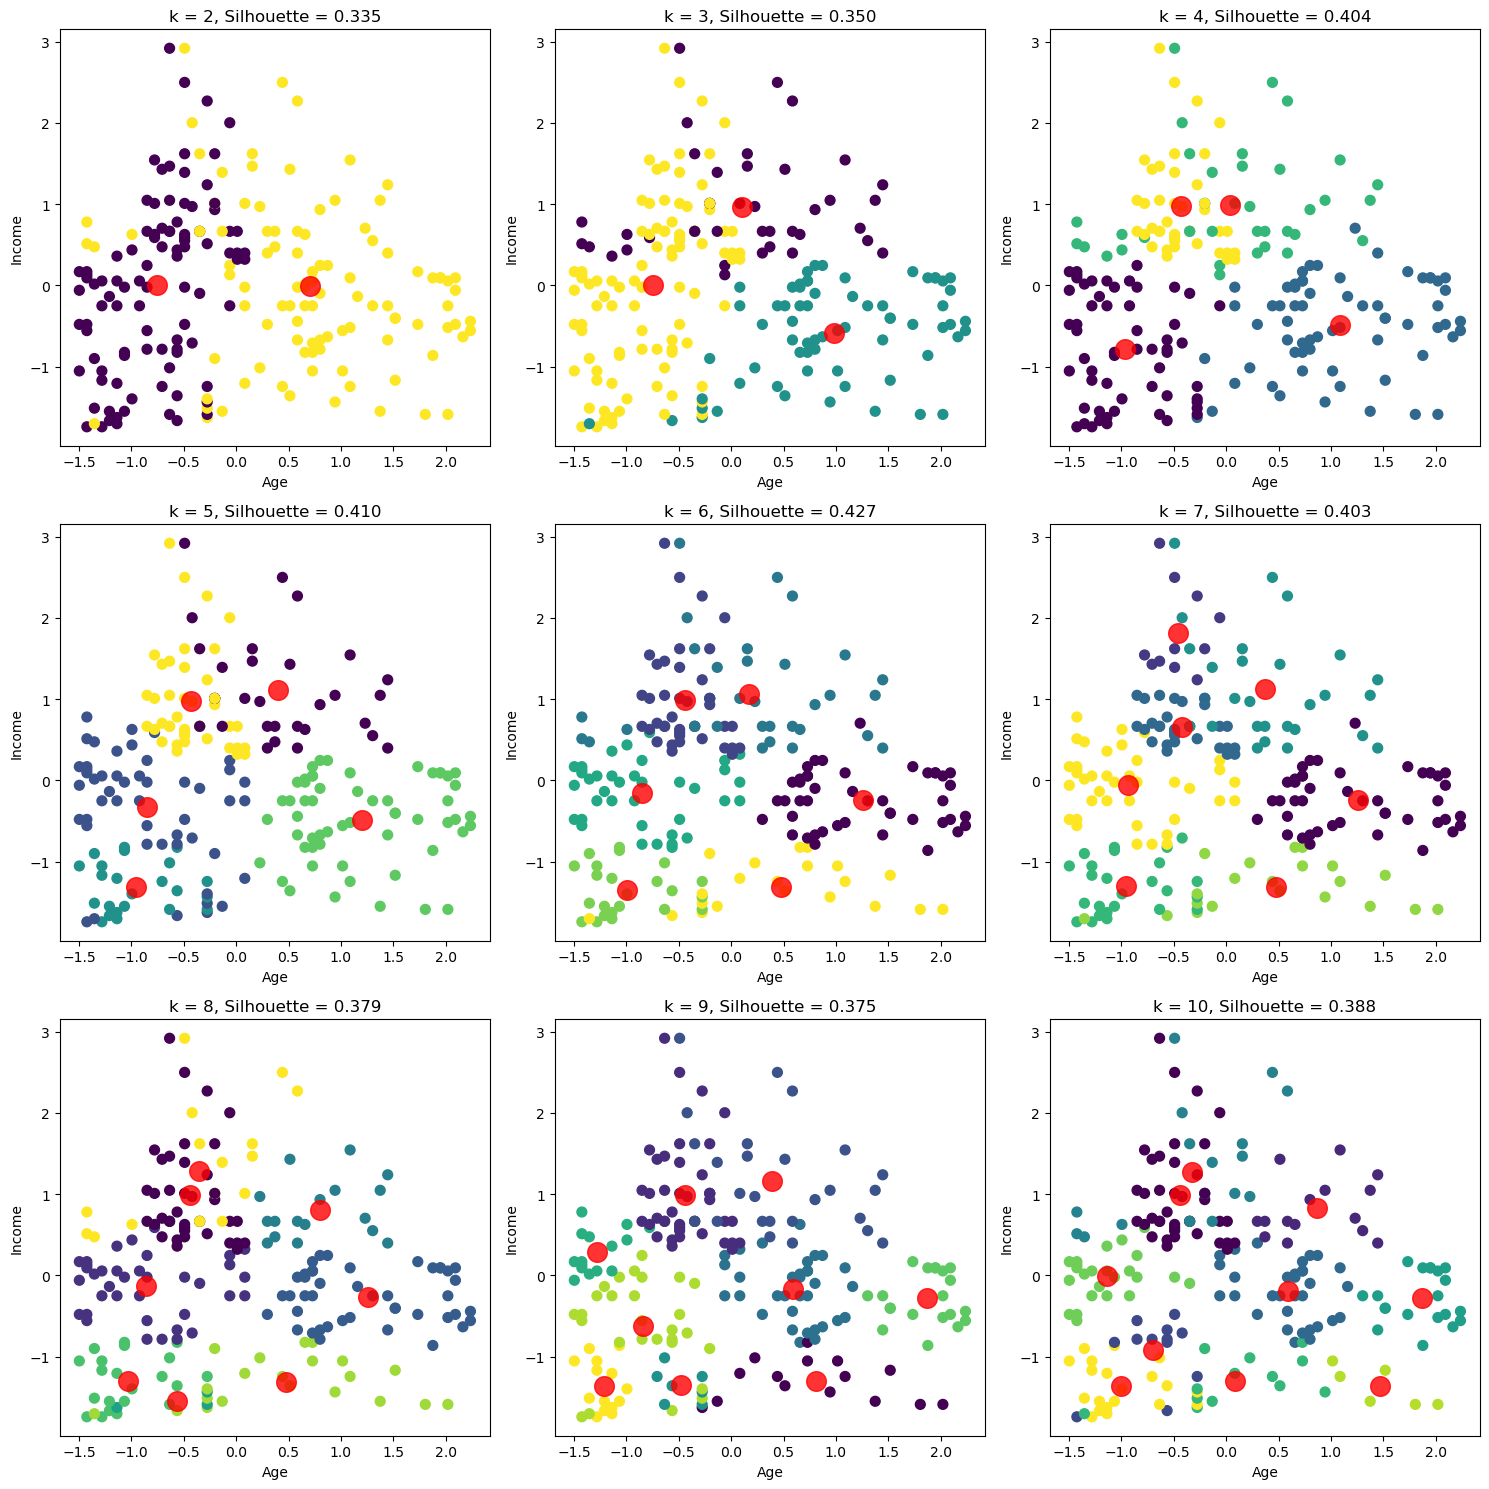

In [124]:
# plotting graphs for k-means --> income against age

# defing subplots
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15)) 

# flatten the axes array for easier indexing
axes = axes.flatten()  

 # range of n values to try
k_values = range(2, 11)  

# loop to test every single hyperparameter and plot results 
for i, k in enumerate(k_values):
    # k-means model
    model = KMeans(n_clusters=k).fit(dataset)
    # predicting on the same dataset
    y_kmeans = model.predict(dataset)
    # labels
    label = model.labels_
    # silhouette score
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print(f"For n_clusters={k}, The Silhouette Coefficient is {sil_coeff:.3f}")

    # plot on the corresponding subplot
    ax = axes[i]  # get the current subplot
    ax.scatter(dataset['Age'], dataset['Income'], c=y_kmeans, s=50, cmap='viridis')

    # cluster centers
    centers = model.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
    
    # labels
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_title(f"k = {k}, Silhouette = {sil_coeff:.3f}")  # Set title with k and score

# plotting
plt.tight_layout()  
plt.show()

# 4 clusters is the best for showing income against age --> cleanly separates the scatter into 4 distinc clusters with minimal overlap, and has one of the highest Sillhoutte coefficients.

#

# K-MEANS --> AMOUNT SPENT AGAINST AGE

For n_clusters=2, The Silhouette Coefficient is 0.222
For n_clusters=3, The Silhouette Coefficient is 0.352
For n_clusters=4, The Silhouette Coefficient is 0.404
For n_clusters=5, The Silhouette Coefficient is 0.410
For n_clusters=6, The Silhouette Coefficient is 0.386
For n_clusters=7, The Silhouette Coefficient is 0.419
For n_clusters=8, The Silhouette Coefficient is 0.409
For n_clusters=9, The Silhouette Coefficient is 0.372
For n_clusters=10, The Silhouette Coefficient is 0.365


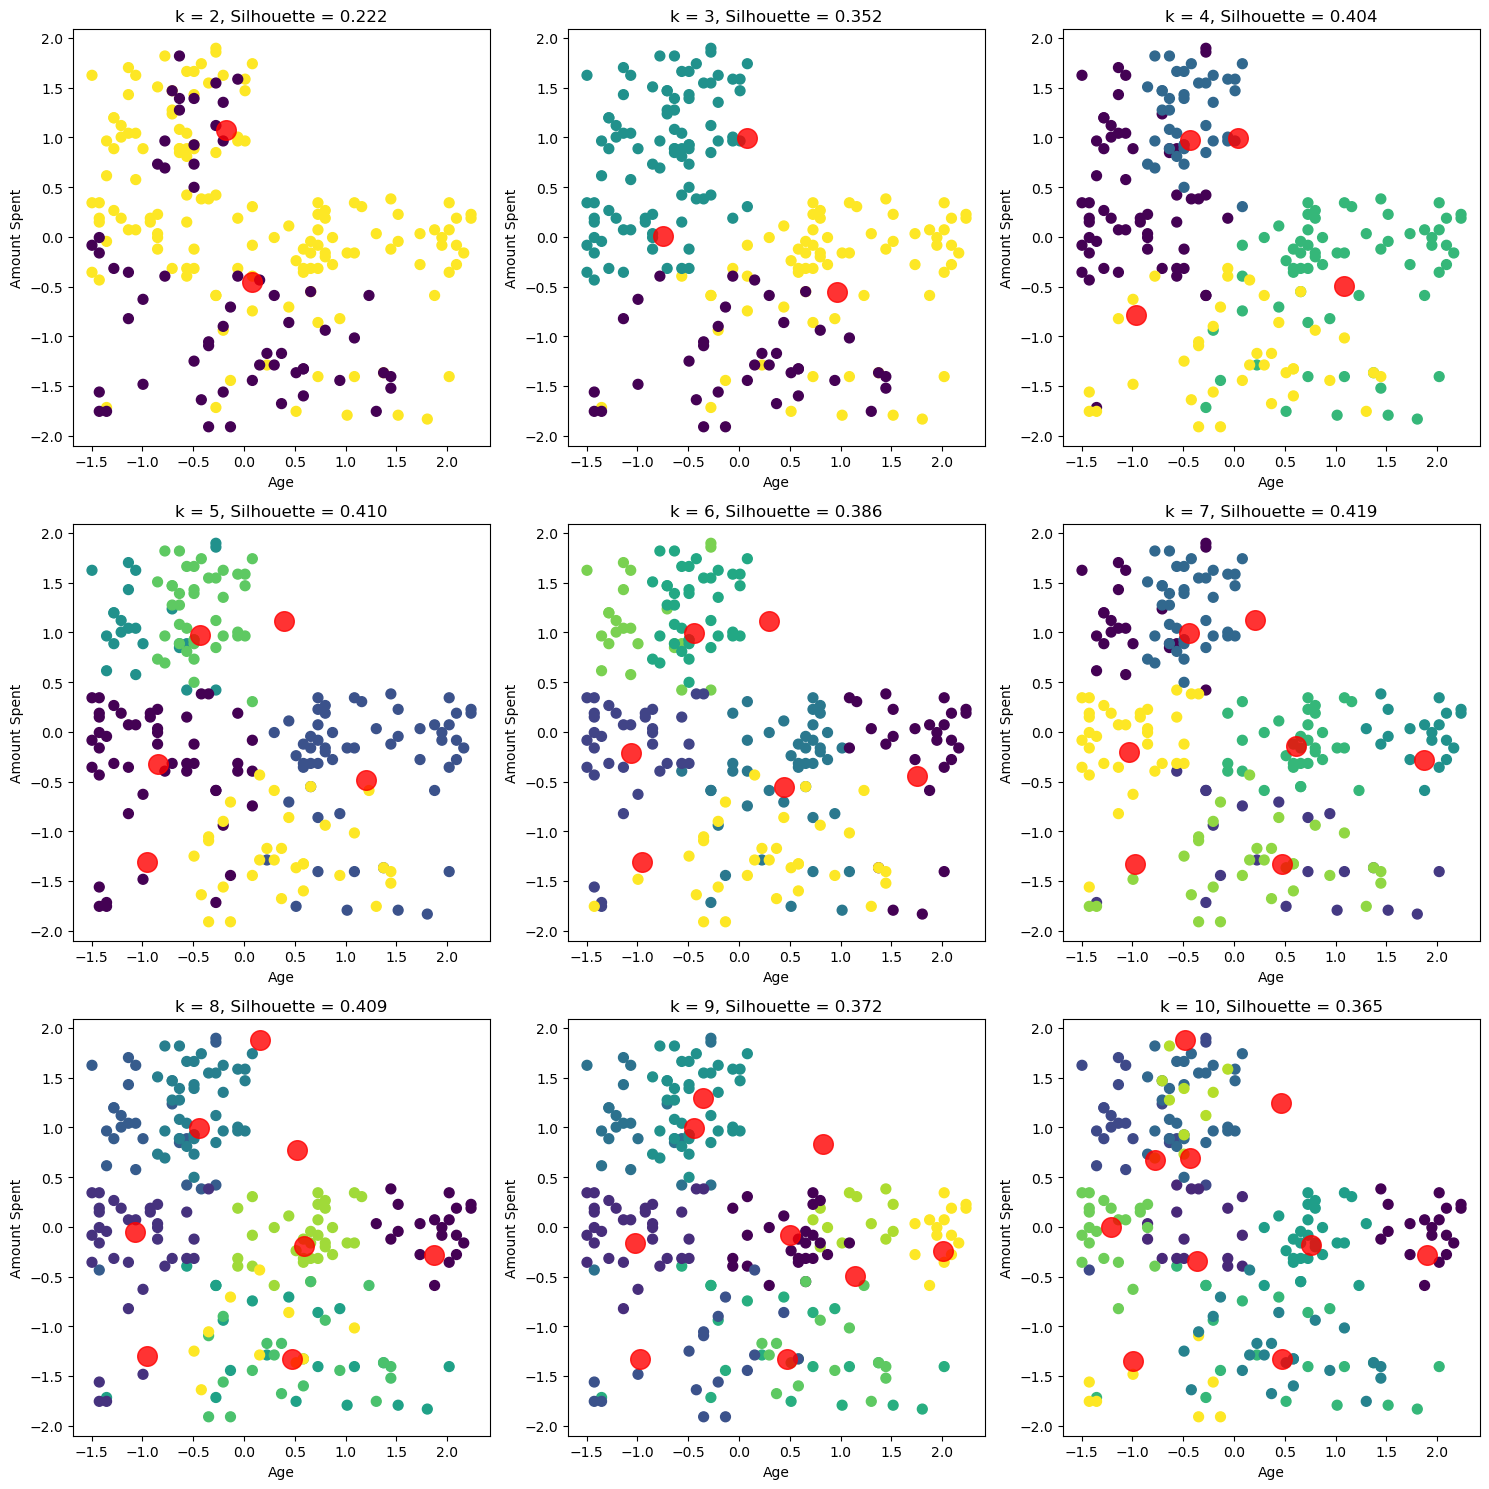

In [125]:
# plotting the graphs for k-means --> amount spent against age

# defing subplots
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15)) 

# flatten the axes array for easier indexing
axes = axes.flatten()  

 # range of n values to try
k_values = range(2, 11)  

# loop to test every single hyperparameter and plot results 
for i, k in enumerate(k_values):
    # k-means model
    model = KMeans(n_clusters=k).fit(dataset)
    # predicting on the same dataset
    y_kmeans = model.predict(dataset)
    # labels
    label = model.labels_
    # silhouette score
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print(f"For n_clusters={k}, The Silhouette Coefficient is {sil_coeff:.3f}")

    # plot on the corresponding subplot
    ax = axes[i]  # get the current subplot
    ax.scatter(dataset['Age'], dataset['Amount Spent'], c=y_kmeans, s=50, cmap='viridis')

    # cluster centers
    centers = model.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
    
    # labels
    ax.set_xlabel('Age')
    ax.set_ylabel('Amount Spent')
    ax.set_title(f"k = {k}, Silhouette = {sil_coeff:.3f}")  # Set title with k and score

# plotting
plt.tight_layout()  
plt.show()

# 2 clusters is the best for showing Amount Spent against Age --> the graph shows two very distinct clusters that are far apart from each other and are very obviously seen as clusters even without colouring. However, this is not complex enough.

#

# K-MEANS --> AMOUNT SPENT AGAINST INCOME

For n_clusters=2, The Silhouette Coefficient is 0.335
For n_clusters=3, The Silhouette Coefficient is 0.305
For n_clusters=4, The Silhouette Coefficient is 0.404
For n_clusters=5, The Silhouette Coefficient is 0.417
For n_clusters=6, The Silhouette Coefficient is 0.398
For n_clusters=7, The Silhouette Coefficient is 0.350
For n_clusters=8, The Silhouette Coefficient is 0.406
For n_clusters=9, The Silhouette Coefficient is 0.407
For n_clusters=10, The Silhouette Coefficient is 0.382


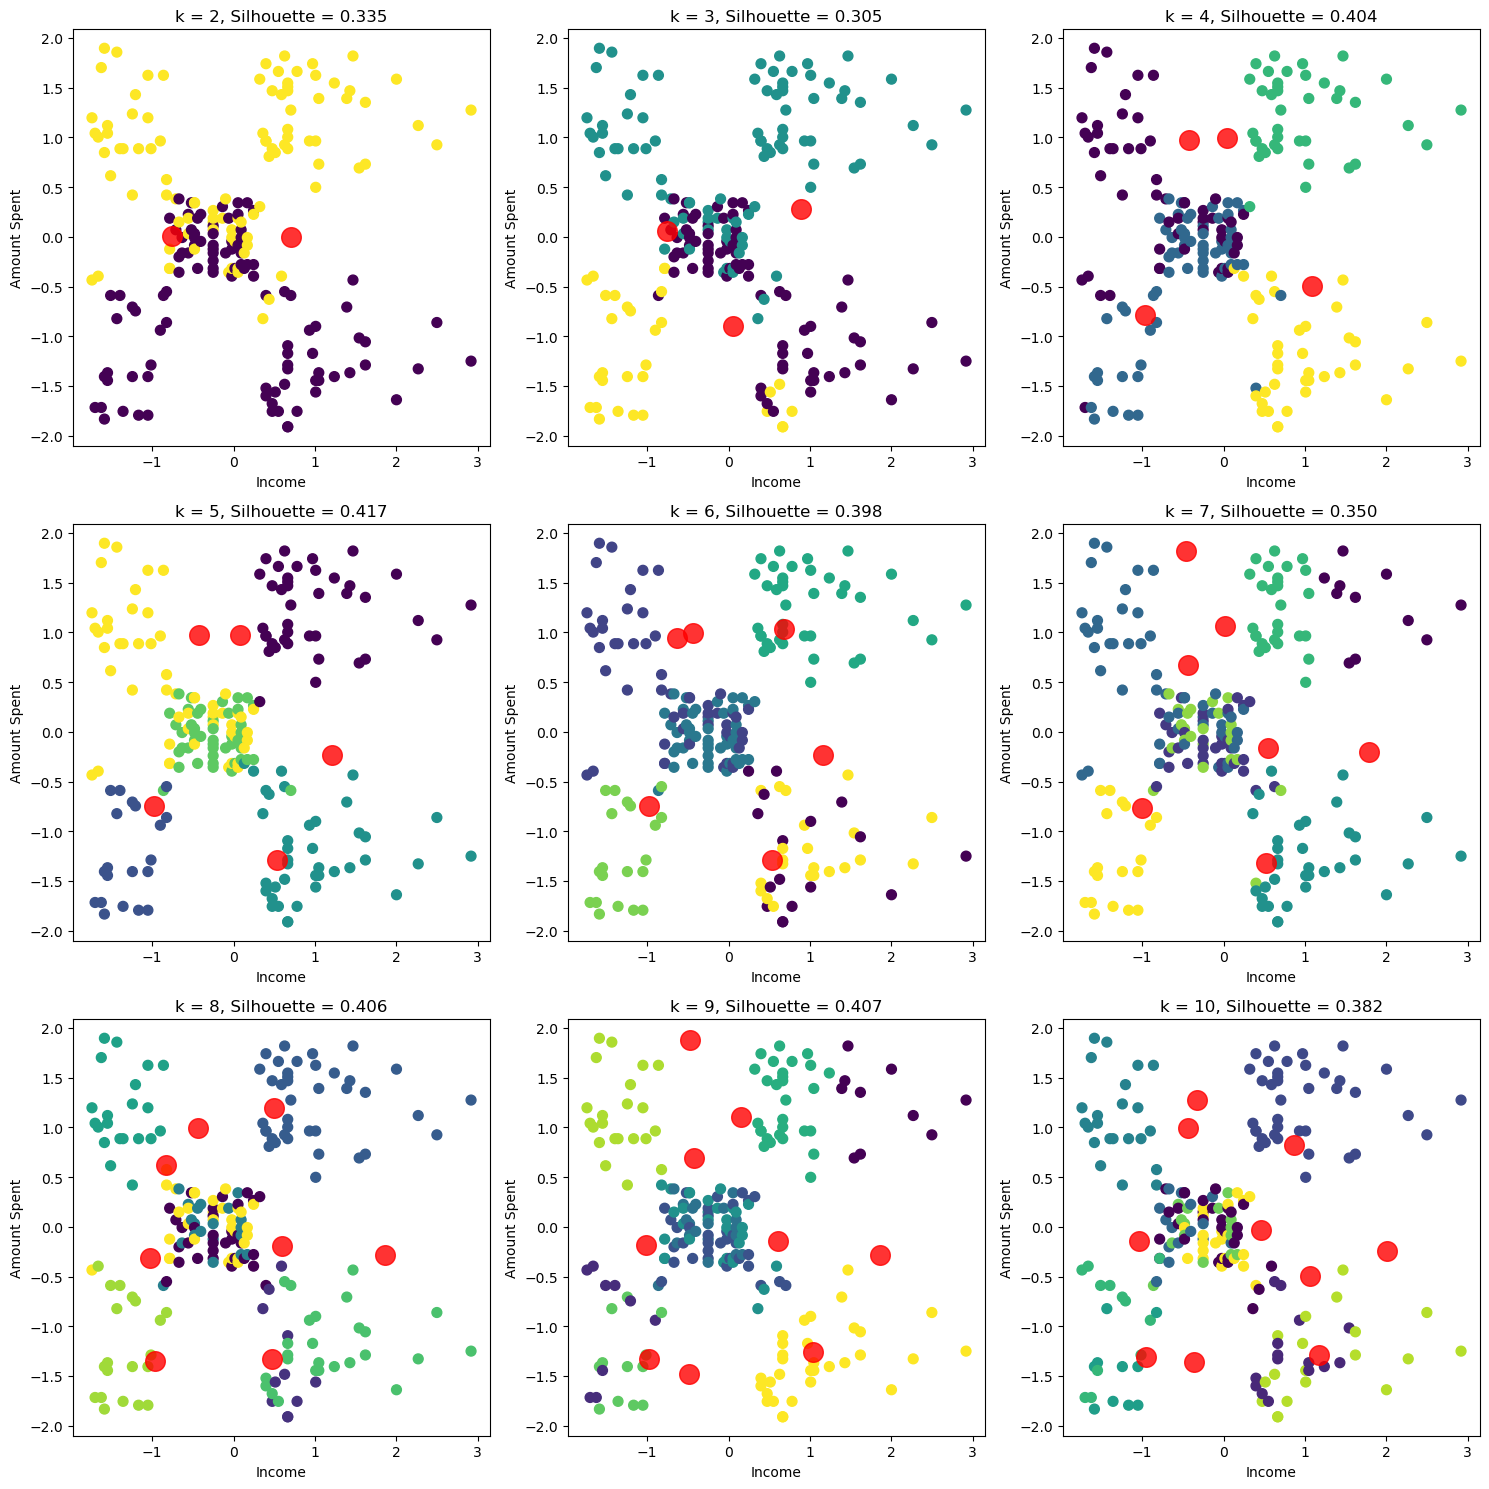

In [126]:
# plotting the graphs for k-means --> amount spent against income

# defing subplots
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15)) 

# flatten the axes array for easier indexing
axes = axes.flatten()  

 # range of n values to try
k_values = range(2, 11)  

# loop to test every single hyperparameter and plot results 
for i, k in enumerate(k_values):
    # k-means model
    model = KMeans(n_clusters=k).fit(dataset)
    # predicting on the same dataset
    y_kmeans = model.predict(dataset)
    # labels
    label = model.labels_
    # silhouette score
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print(f"For n_clusters={k}, The Silhouette Coefficient is {sil_coeff:.3f}")

    # plot on the corresponding subplot
    ax = axes[i]  # get the current subplot
    ax.scatter(dataset['Income'], dataset['Amount Spent'], c=y_kmeans, s=50, cmap='viridis')

    # cluster centers
    centers = model.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
    
    # labels
    ax.set_xlabel('Income')
    ax.set_ylabel('Amount Spent')
    ax.set_title(f"k = {k}, Silhouette = {sil_coeff:.3f}")  # Set title with k and score

# plotting
plt.tight_layout()  
plt.show()

# 5 clusters is the best as it  correectly clusters the very obviously clustered data, but overlaps quite a bit. It also has the highest silhouette coefficient so it is the best.

#

# GMM

#

# GMM --> INCOME AGAINST AGE

For n_components=2, The BIC is 1656.962
For n_components=3, The BIC is 1630.171
For n_components=4, The BIC is 1596.999
For n_components=5, The BIC is 1627.524
For n_components=6, The BIC is 1607.147
For n_components=7, The BIC is 1630.283
For n_components=8, The BIC is 1666.463
For n_components=9, The BIC is 1693.542
For n_components=10, The BIC is 1728.636


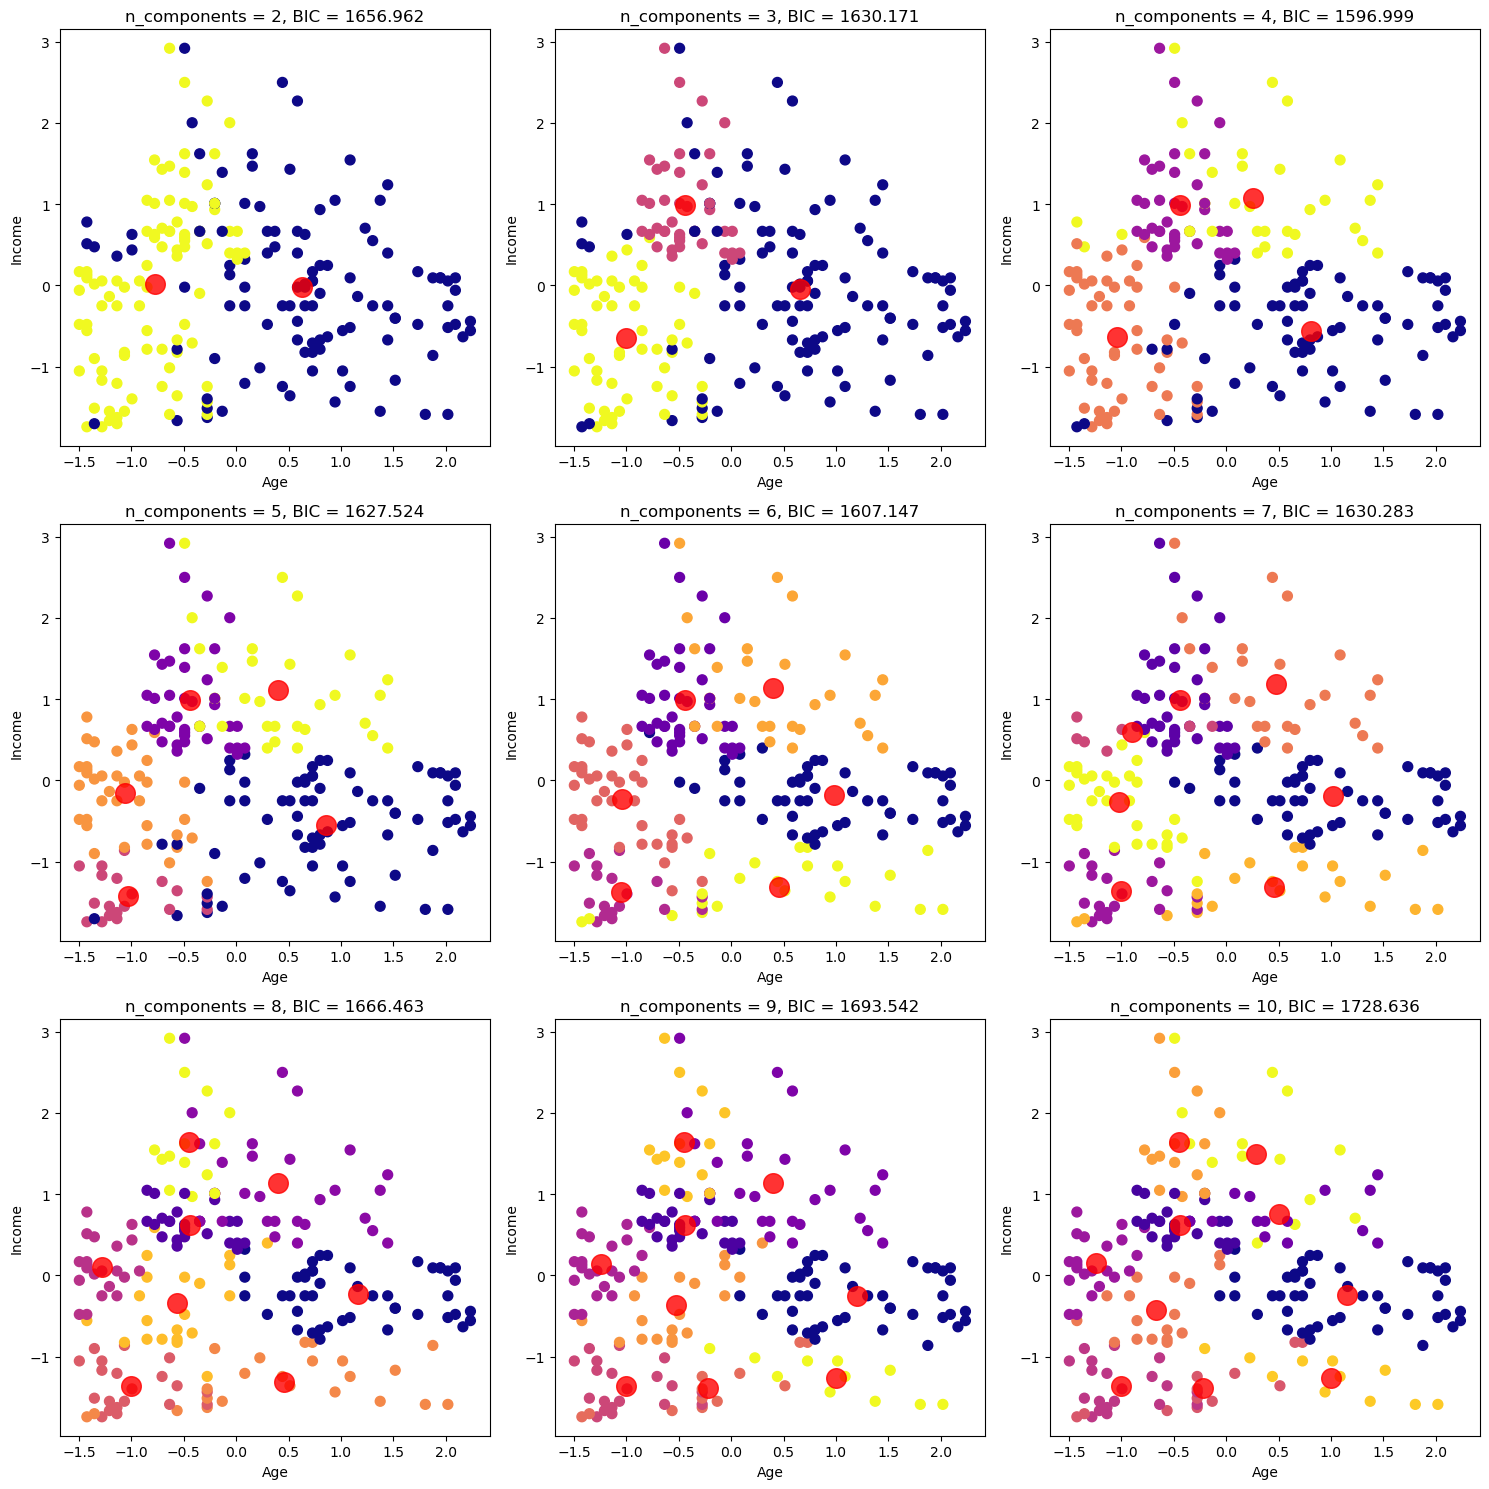

In [136]:
# plotting the graphs for gmm --> income against age

# defing subplots
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# flatten the axes array for easier indexing
axes = axes.flatten()

# range of n components to try
n_components_values = range(2, 11)  

for i, n_components in enumerate(n_components_values):
    # GMM model
    gmm = GaussianMixture(n_components=n_components, random_state=42) 

    # fit the dataset into gmm model
    gmm.fit(dataset)

    # predicting on the same dataset
    labels = gmm.predict(dataset)

    # calculate BIC (Bayesian Information Criterion) for model selection
    bic = gmm.bic(dataset)
    print(f"For n_components={n_components}, The BIC is {bic:.3f}")

    # plot on the corresponding subplot
    ax = axes[i]
    ax.scatter(dataset['Age'], dataset['Income'], c=labels, s=50, cmap='plasma')

    # GMM doesn't have direct "centers" like k-means, but we can plot the means of each cluster
    cluster_means = dataset.groupby(labels)[['Age', 'Income']].mean().values
    ax.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, alpha=0.8)  # Plot cluster means

    # labels
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_title(f"n_components = {n_components}, BIC = {bic:.3f}")

# plotting
plt.tight_layout()
plt.show()

# 4 clusters is the best, as by visualisation, there are 4 distinct and clear clusters with minimal overlap. Furtheromore, 4 clusters has the best BIC score, suggesting that it has the best balance of having a good fit to the data without being overly complex compared to other n values.

#

# GMM --> AMOUNT SPENT AGAINST AGE

For n_components=2, The BIC is 1656.962
For n_components=3, The BIC is 1630.171
For n_components=4, The BIC is 1596.999
For n_components=5, The BIC is 1627.524
For n_components=6, The BIC is 1607.147
For n_components=7, The BIC is 1630.283
For n_components=8, The BIC is 1666.463
For n_components=9, The BIC is 1693.542
For n_components=10, The BIC is 1728.636


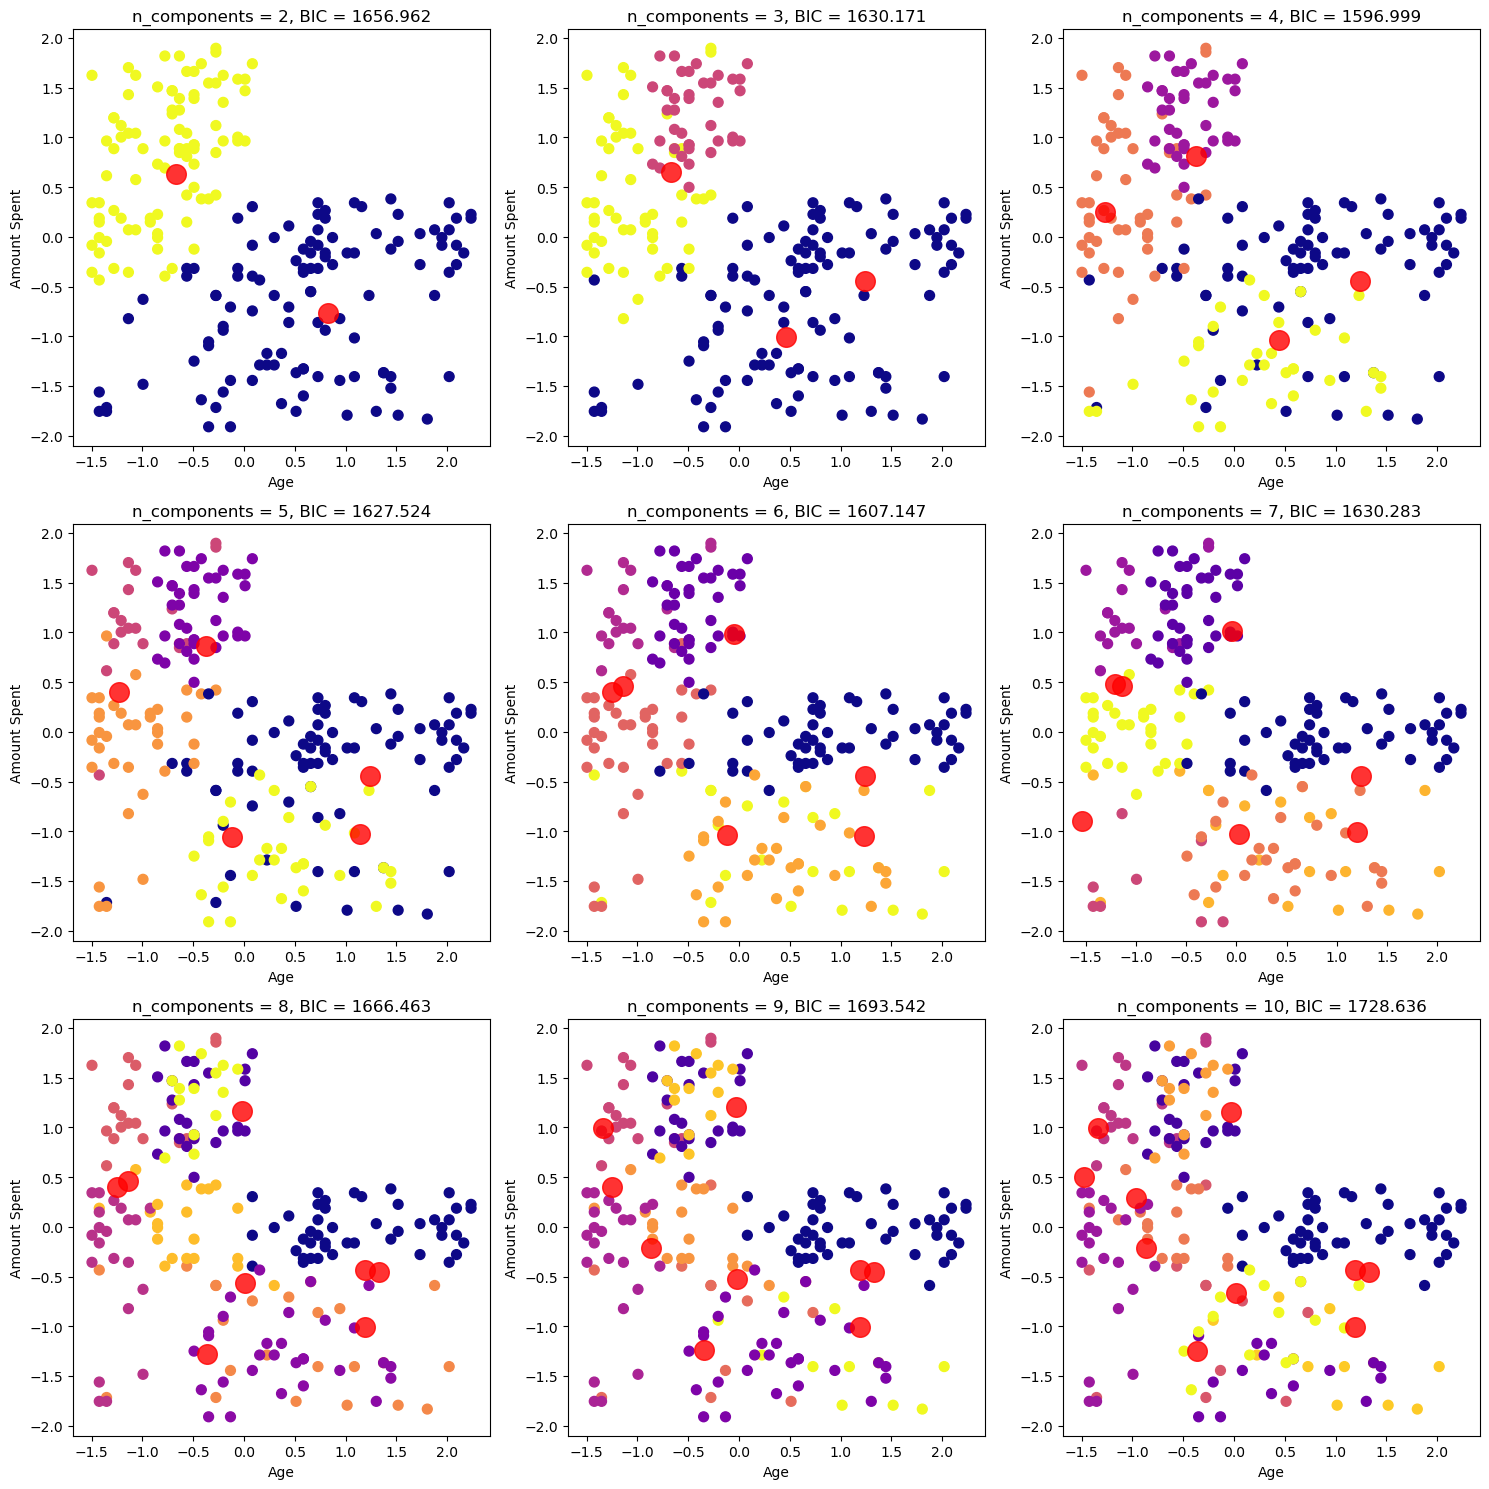

In [128]:
# plotting the graphs for gmm --> amount spent against age

# defing subplots
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# flatten the axes array for easier indexing
axes = axes.flatten()

# range of n components to try
n_components_values = range(2, 11)  

for i, n_components in enumerate(n_components_values):
    # GMM model
    gmm = GaussianMixture(n_components=n_components, random_state=42) 

    # fit the dataset into gmm model
    gmm.fit(dataset)

    # predicting on the same dataset
    labels = gmm.predict(dataset)

    # calculate BIC (Bayesian Information Criterion) for model selection
    bic = gmm.bic(dataset)
    print(f"For n_components={n_components}, The BIC is {bic:.3f}")

    # plot on the corresponding subplot
    ax = axes[i]
    ax.scatter(dataset['Age'], dataset['Amount Spent'], c=labels, s=50, cmap='plasma')

    # GMM doesn't have direct "centers" like k-means, but we can plot the means of each cluster
    cluster_means = dataset.groupby(labels)[['Amount Spent', 'Age']].mean().values
    ax.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, alpha=0.8)  # Plot cluster means

    # labels
    ax.set_xlabel('Age')
    ax.set_ylabel('Amount Spent')
    ax.set_title(f"n_components = {n_components}, BIC = {bic:.3f}")

# plotting
plt.tight_layout()
plt.show()

# 4 clusters is the best, as it shows the least overlap visually but shows 4 not very distinct clusters, it has the lowers BIC score, suggesting that it has the best balance of having a good fit to the data without being overly complex compared to other n values.

#

# GMM --> AMOUNT SPENT AGAINST INCOME

For n_components=2, The BIC is 1656.962
For n_components=3, The BIC is 1630.171
For n_components=4, The BIC is 1596.999
For n_components=5, The BIC is 1627.524
For n_components=6, The BIC is 1607.147
For n_components=7, The BIC is 1630.283
For n_components=8, The BIC is 1666.463
For n_components=9, The BIC is 1693.542
For n_components=10, The BIC is 1728.636


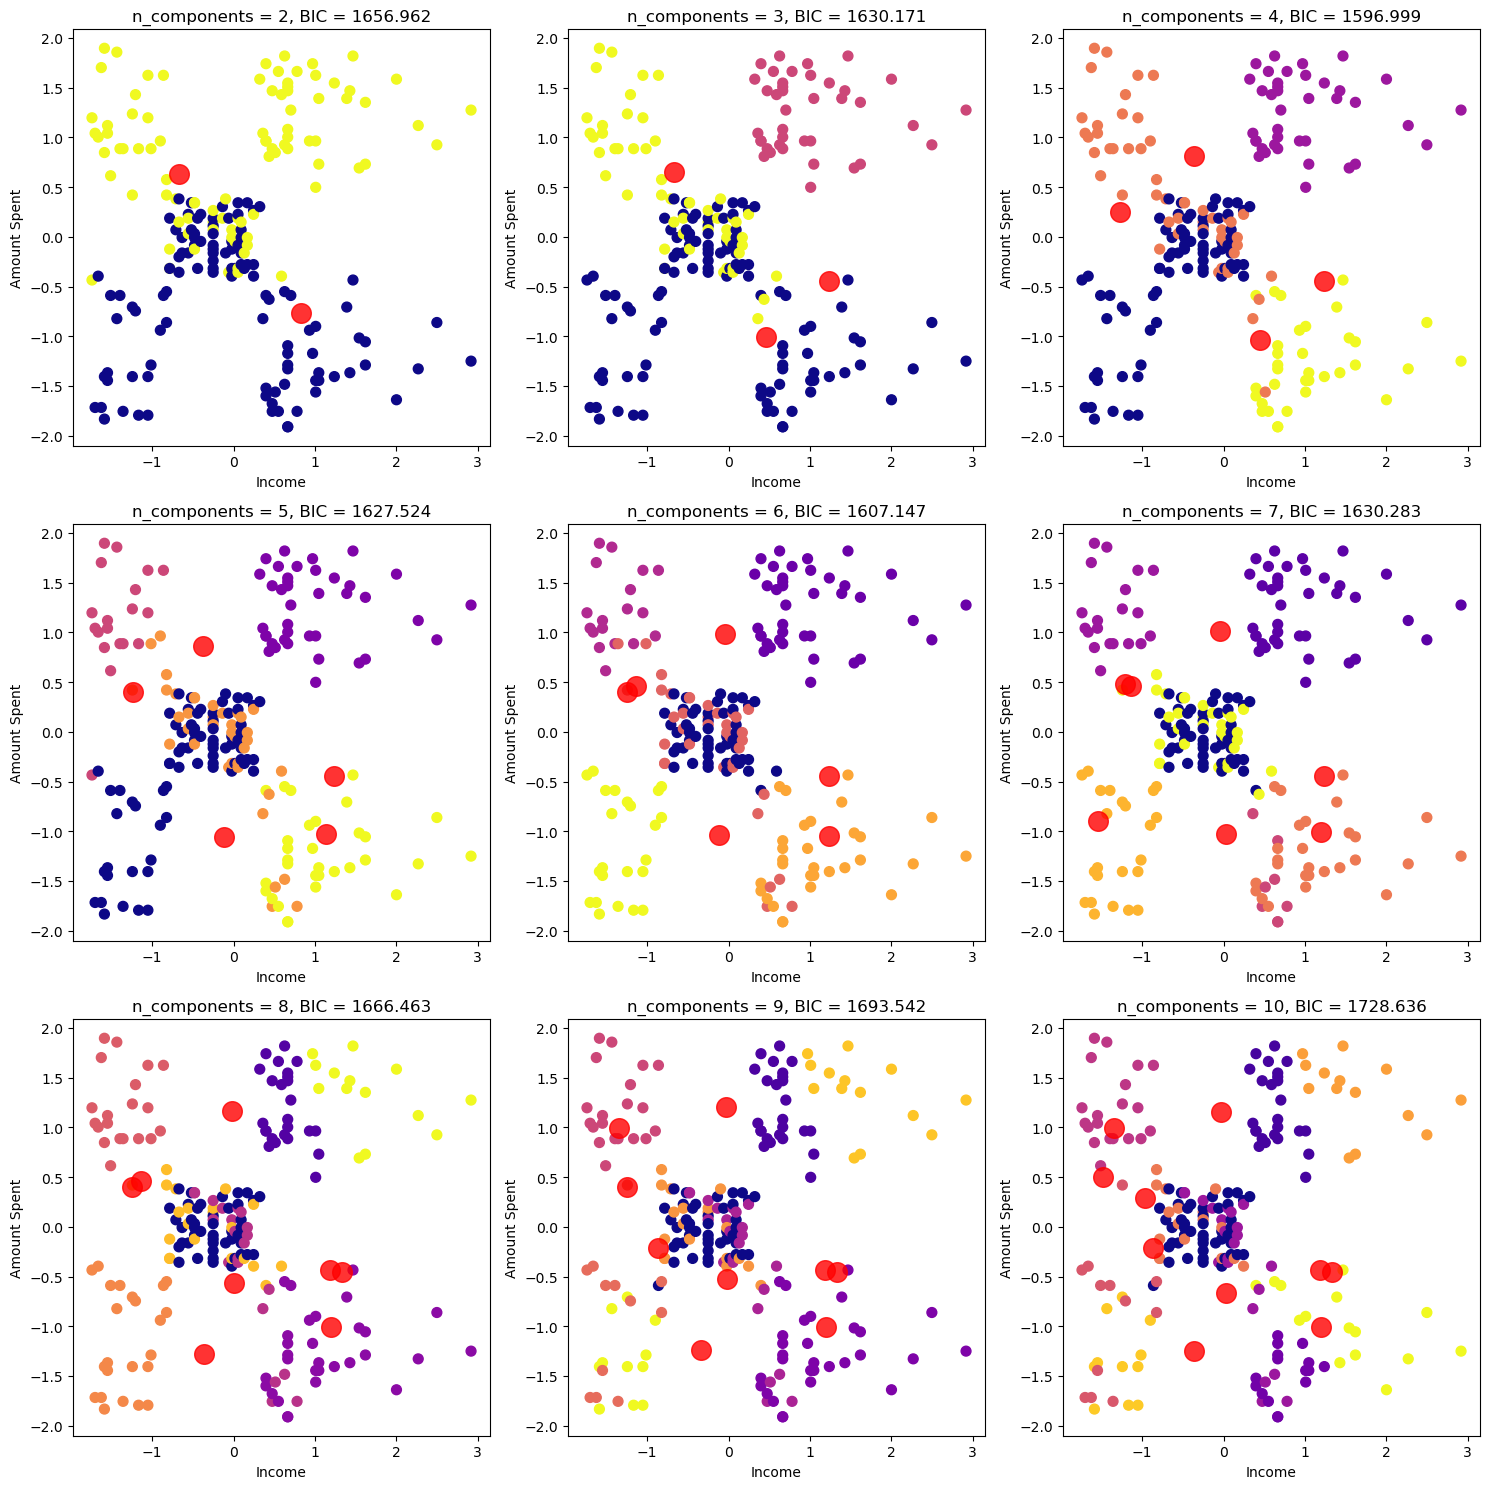

In [129]:
# plotting the graphs for gmm --> amount spent against income

# defing subplots
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# flatten the axes array for easier indexing
axes = axes.flatten()

# range of n components to try
n_components_values = range(2, 11)  

for i, n_components in enumerate(n_components_values):
    # GMM model
    gmm = GaussianMixture(n_components=n_components, random_state=42) 

    # fit the dataset into gmm model
    gmm.fit(dataset)

    # predicting on the same dataset
    labels = gmm.predict(dataset)

    # calculate BIC (Bayesian Information Criterion) for model selection
    bic = gmm.bic(dataset)
    print(f"For n_components={n_components}, The BIC is {bic:.3f}")

    # plot on the corresponding subplot
    ax = axes[i]
    ax.scatter(dataset['Income'], dataset['Amount Spent'], c=labels, s=50, cmap='plasma')

    # GMM doesn't have direct "centers" like k-means, but we can plot the means of each cluster
    cluster_means = dataset.groupby(labels)[['Amount Spent', 'Age']].mean().values
    ax.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, alpha=0.8)  # Plot cluster means

    # labels
    ax.set_xlabel('Income')
    ax.set_ylabel('Amount Spent')
    ax.set_title(f"n_components = {n_components}, BIC = {bic:.3f}")

# plotting
plt.tight_layout()
plt.show()

# 5 clusters is the best, it shows the best visualisation with minimum overlaps. 5 clusters also has one of the lowest BIC suggesting that it has the best balance of having a good fit to the data without being overly complex compared to other n values.

#

# Hierarchical Clustering : Agglomerative

#

# AGGLOMERATIVE --> INCOME AGAINST AGE

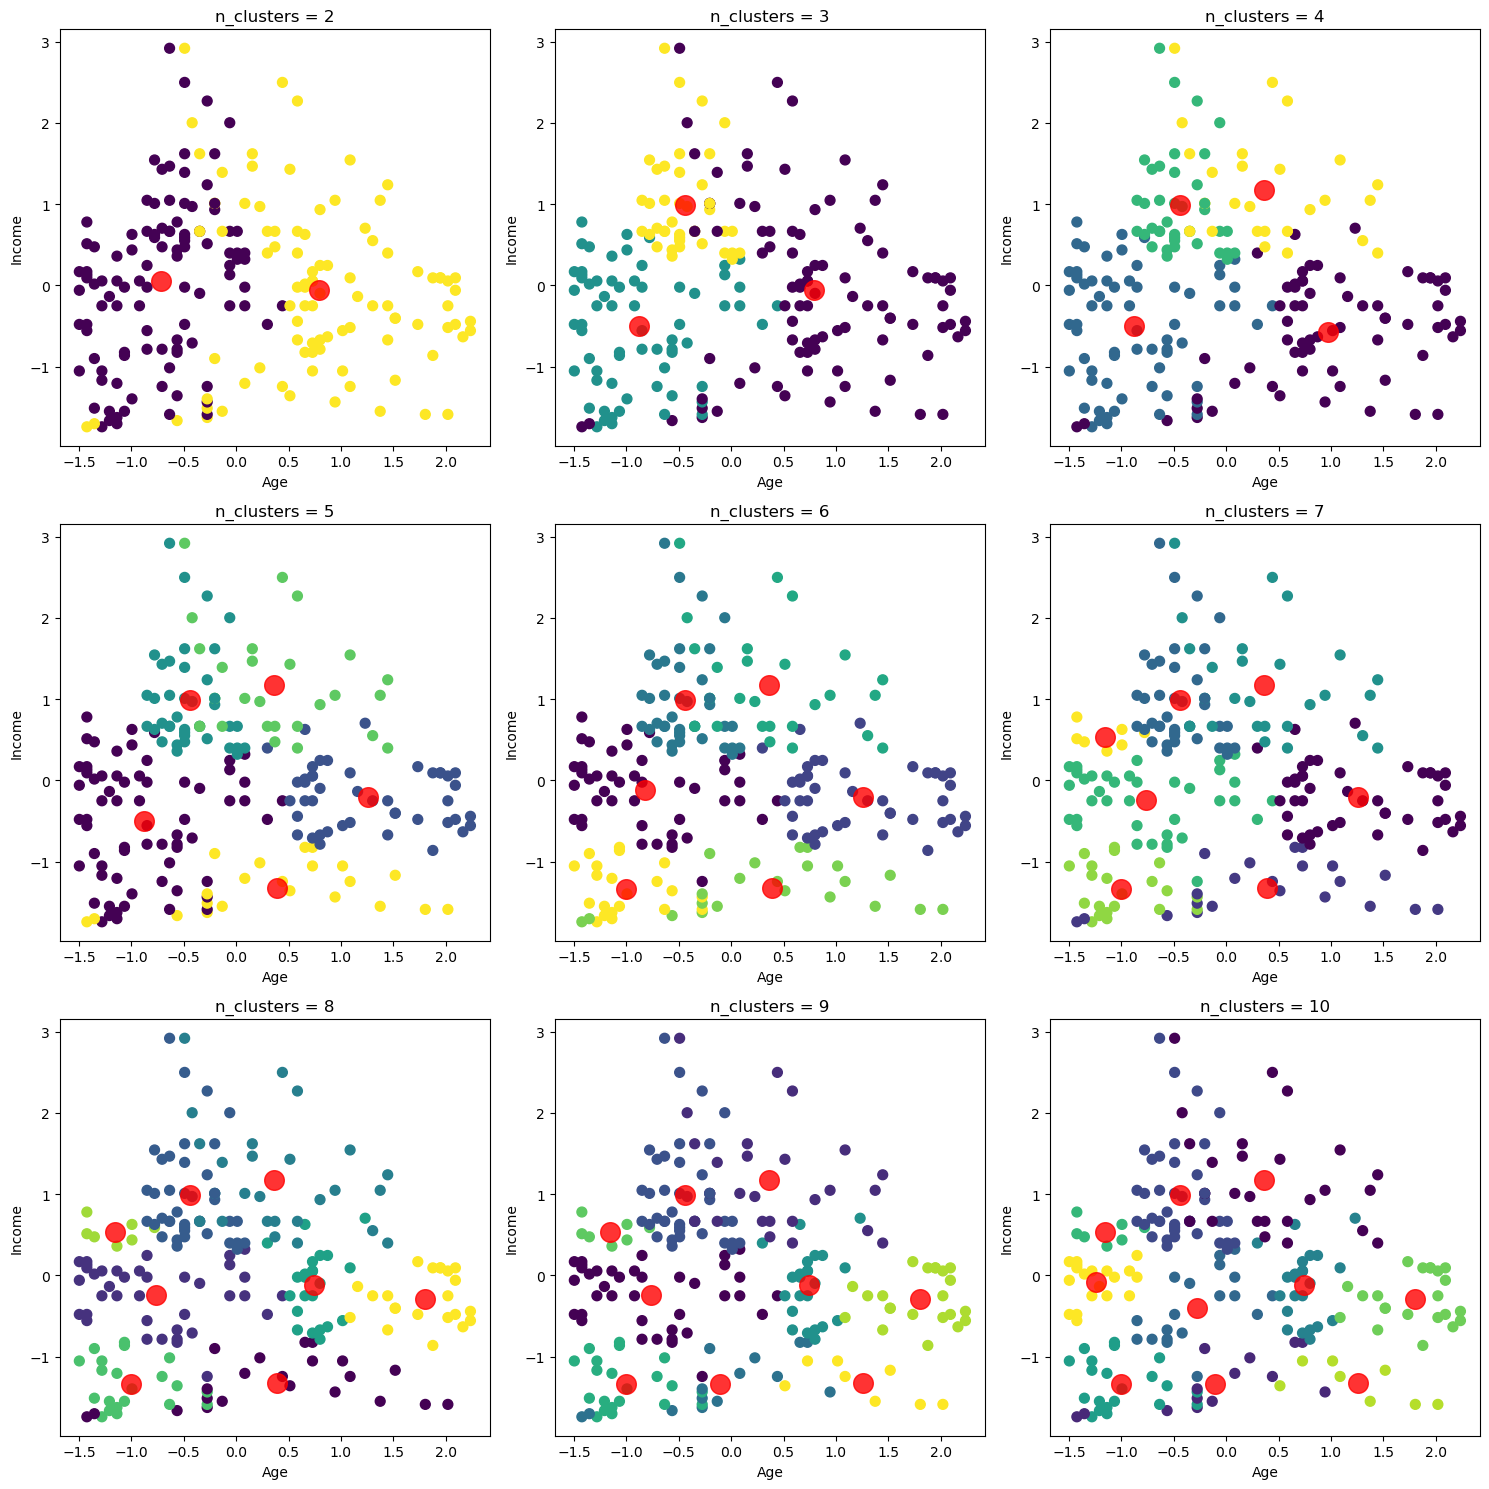

In [130]:
# plotting the graphs for agglomerative --> income against age

# defing subplots
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  

# flatten axes for easy indexing
axes = axes.flatten()  

# range of n clusters
n_clusters_values = range(2, 11)  

for i, n_clusters in enumerate(n_clusters_values):
    
    # fitting agglomerative Clustering model
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean') 
    # euclidean is a good general-purpose choice and often works well as a metric
    labels = agg_clustering.fit_predict(dataset)

    # plot on the corresponding subplot
    ax = axes[i]
    ax.scatter(dataset['Age'], dataset['Income'], c=labels, s=50, cmap='viridis')  

    # agglomerative clustering doesn't have direct "centers" like k-means or GMM
    # plotting the means of each cluster :
    cluster_means = dataset.groupby(labels)[['Age', 'Income']].mean().values  
    ax.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, alpha=0.8)  

    # labels for plots
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_title(f"n_clusters = {n_clusters}") 

plt.tight_layout()
plt.show()

# 3 clusters is the best, it shows the most distinct clusters with the least overlap compared to the rest.

#

# AGGLOMERATIVE --> AMOUNT SPENT AGAINST AGE

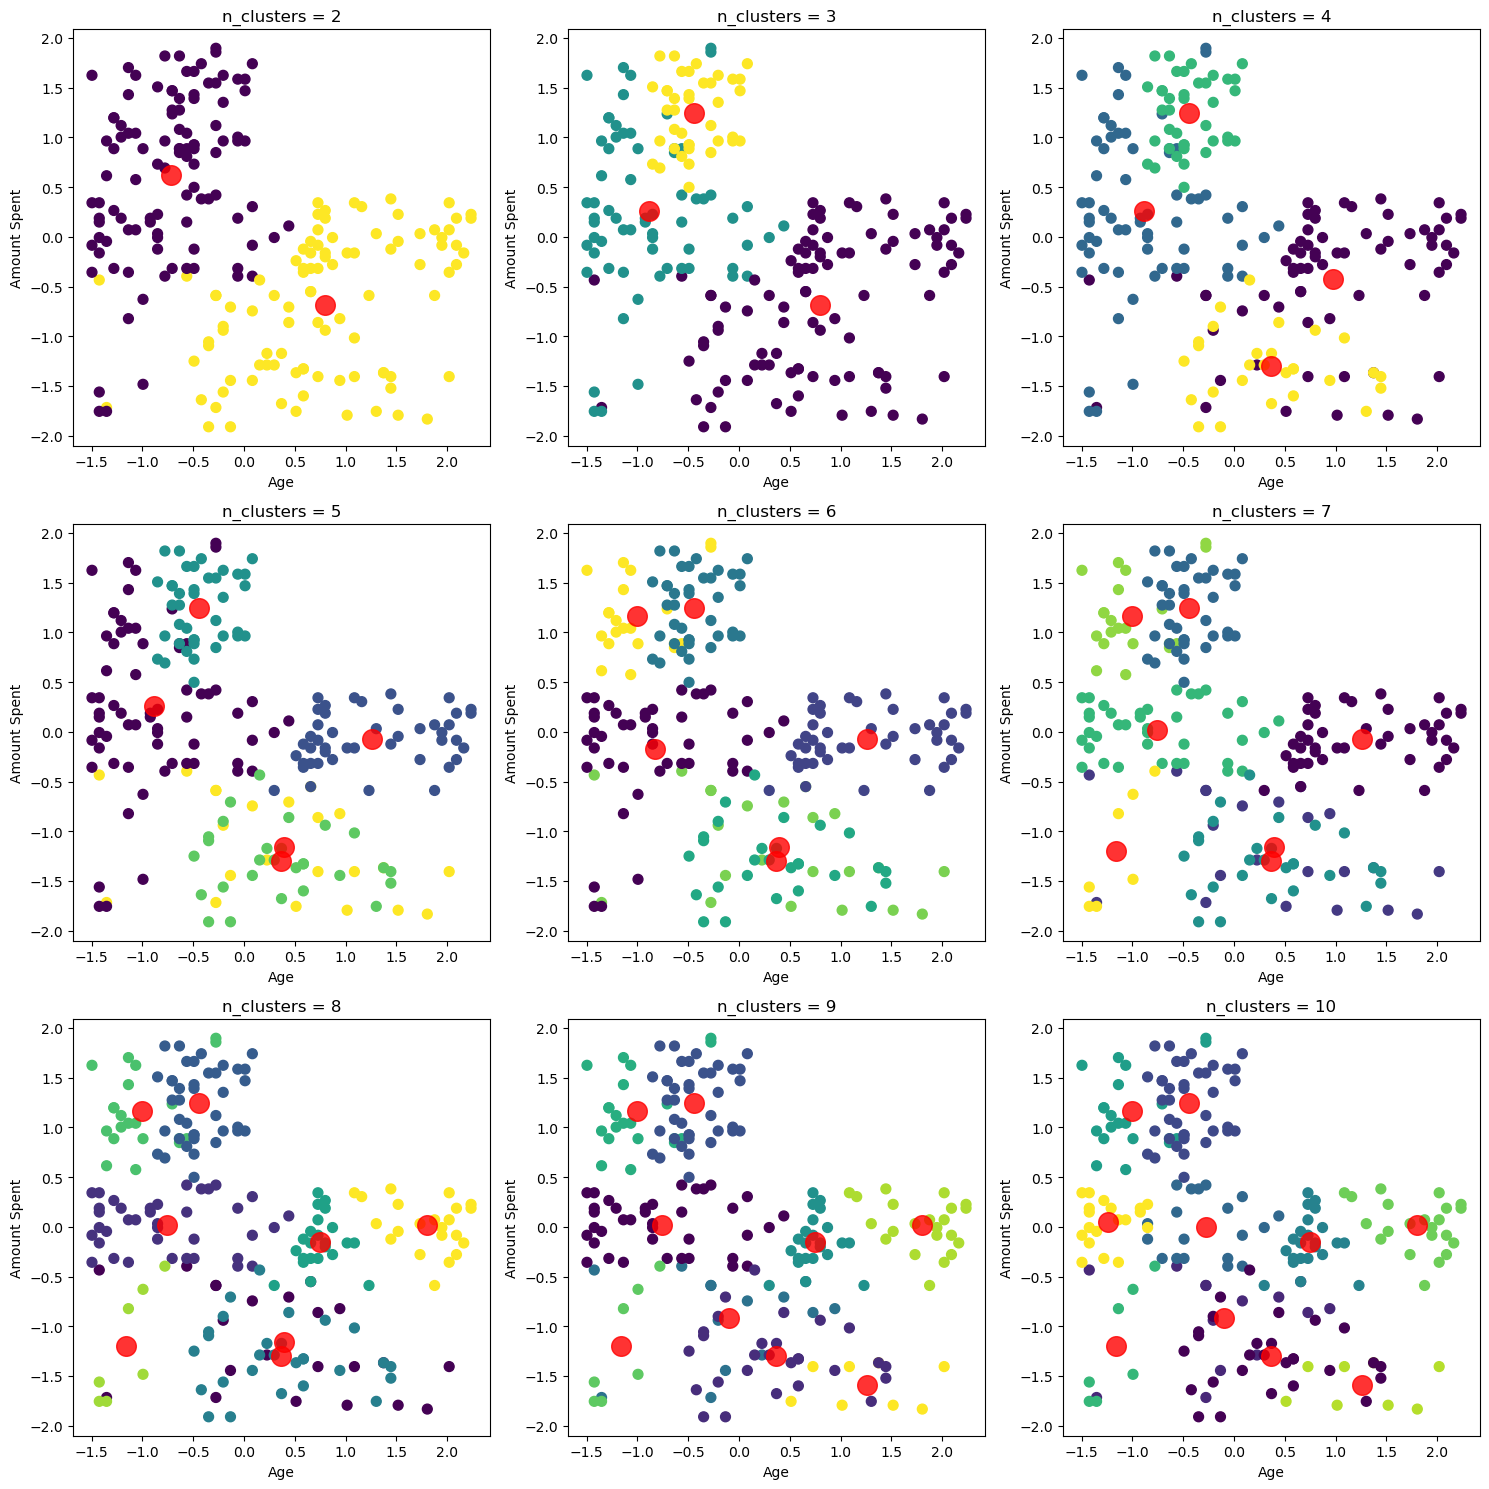

In [131]:
# plotting the graphs for agglomerative --> amount spent against age

# defing subplots
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  

# flatten axes for easy indexing
axes = axes.flatten()  

# range of n clusters
n_clusters_values = range(2, 11)  

for i, n_clusters in enumerate(n_clusters_values):
    
    # fitting agglomerative Clustering model
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean') 
    # euclidean is a good general-purpose choice and often works well as a metric
    labels = agg_clustering.fit_predict(dataset)

    # plot on the corresponding subplot
    ax = axes[i]
    ax.scatter(dataset['Age'], dataset['Amount Spent'], c=labels, s=50, cmap='viridis')  

    # agglomerative clustering doesn't have direct "centers" like k-means or GMM
    # plotting the means of each cluster :
    cluster_means = dataset.groupby(labels)[['Age', 'Amount Spent']].mean().values  
    ax.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, alpha=0.8)  

    # labels for plots
    ax.set_xlabel('Age')
    ax.set_ylabel('Amount Spent')
    ax.set_title(f"n_clusters = {n_clusters}") 

# plotting
plt.tight_layout()
plt.show()

# 3 clusters is the best. This visualization shows good separation between the clusters. The clusters are distinct and relatively compact but has some overlap.

# 

# AGGLOMERATIVE --> AMOUNT SPENT AGAINST INCOME

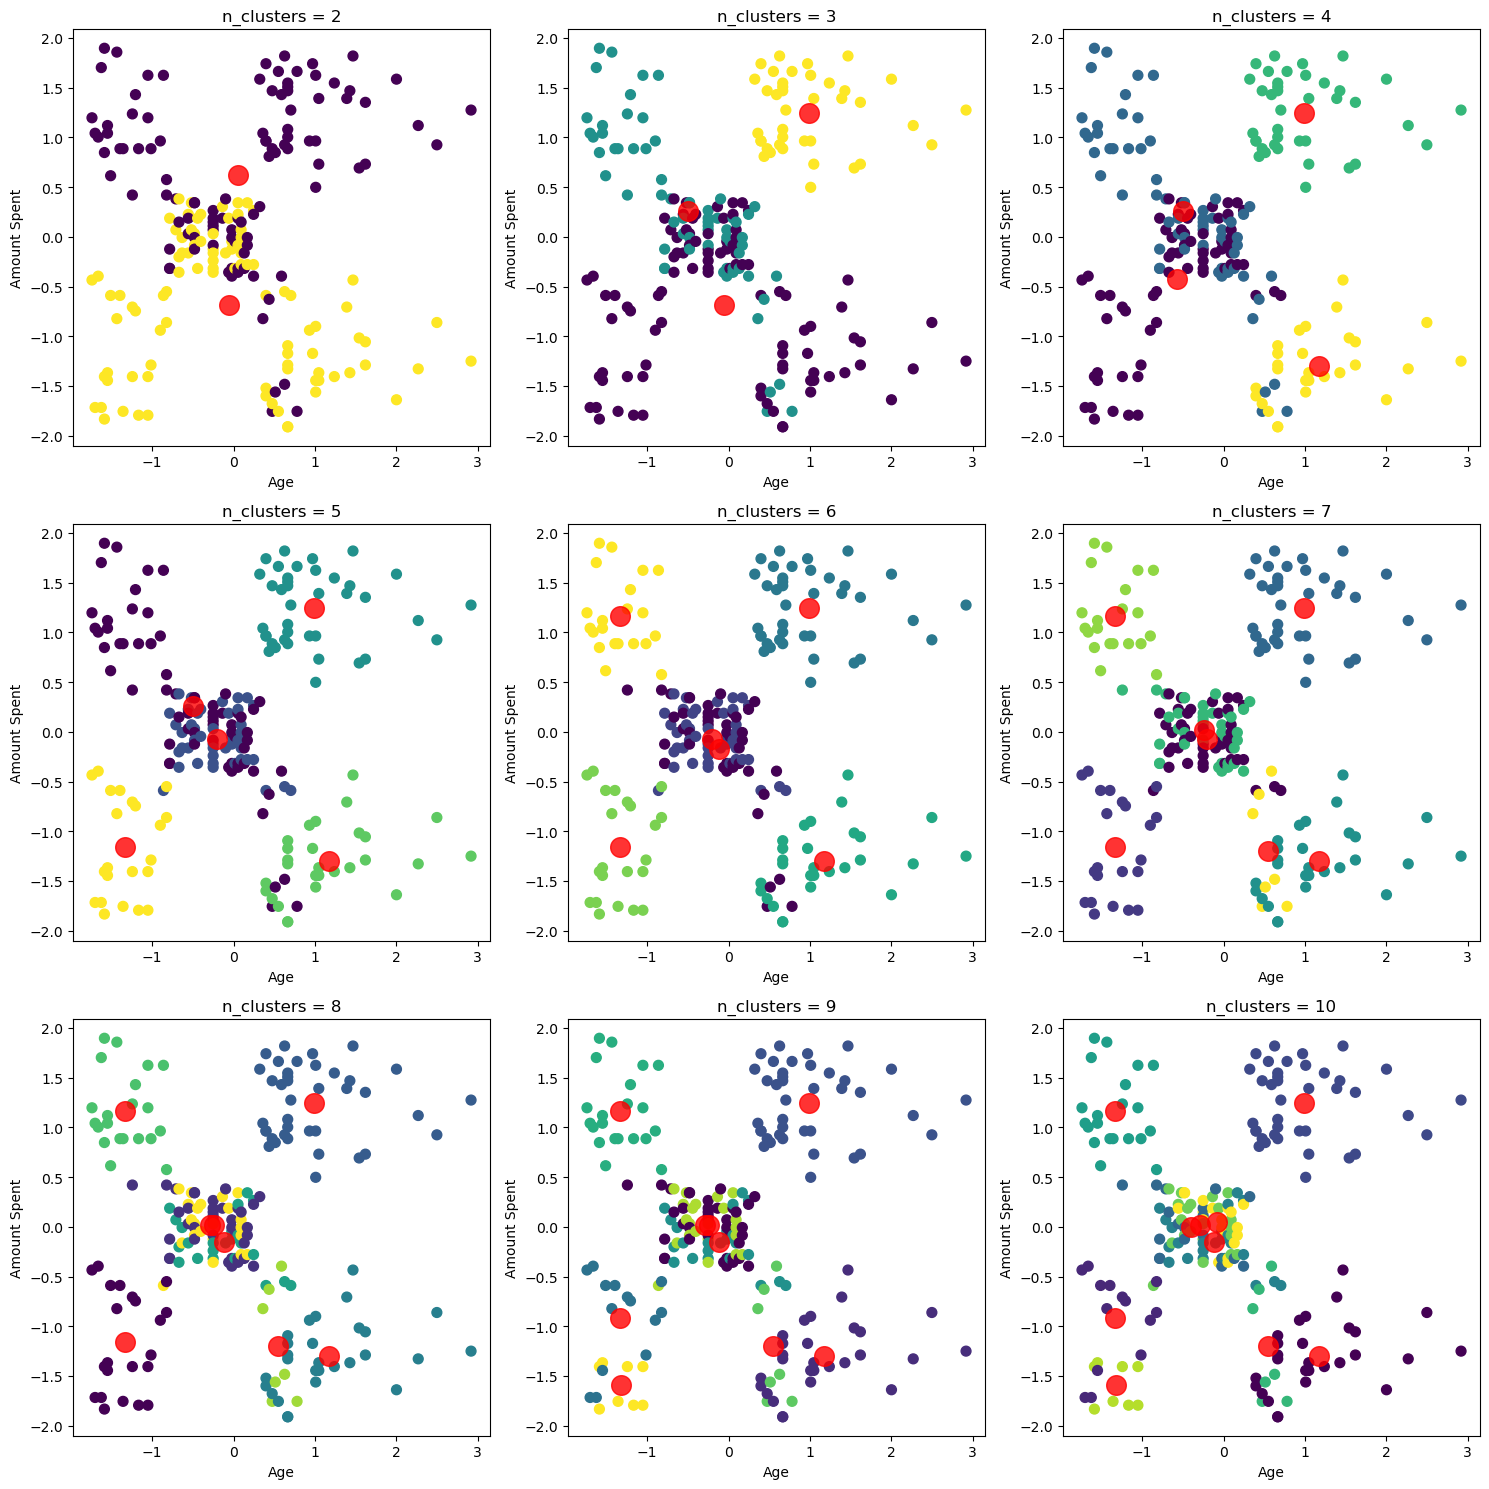

In [132]:
# plotting the graphs for agglomerative --> amount spent against income

# defing subplots
# create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  

# flatten axes for easy indexing
axes = axes.flatten()  

# range of n clusters
n_clusters_values = range(2, 11)  

for i, n_clusters in enumerate(n_clusters_values):
    
    # fitting agglomerative Clustering model
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean') 
    # euclidean is a good general-purpose choice and often works well as a metric
    labels = agg_clustering.fit_predict(dataset)

    # plot on the corresponding subplot
    ax = axes[i]
    ax.scatter(dataset['Income'], dataset['Amount Spent'], c=labels, s=50, cmap='viridis')  

    # agglomerative clustering doesn't have direct "centers" like k-means or GMM
    # plotting the means of each cluster :
    cluster_means = dataset.groupby(labels)[['Income', 'Amount Spent']].mean().values  
    ax.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, alpha=0.8)  

    # labels for plots
    ax.set_xlabel('Age')
    ax.set_ylabel('Amount Spent')
    ax.set_title(f"n_clusters = {n_clusters}") 

plt.tight_layout()
plt.show()

# 5 clusters is the best as it clusters out the 5 obvious clusters that are obviously seen even before carrying out clustering despite having some overlap with other clusters at the center

#

# Conclusion :

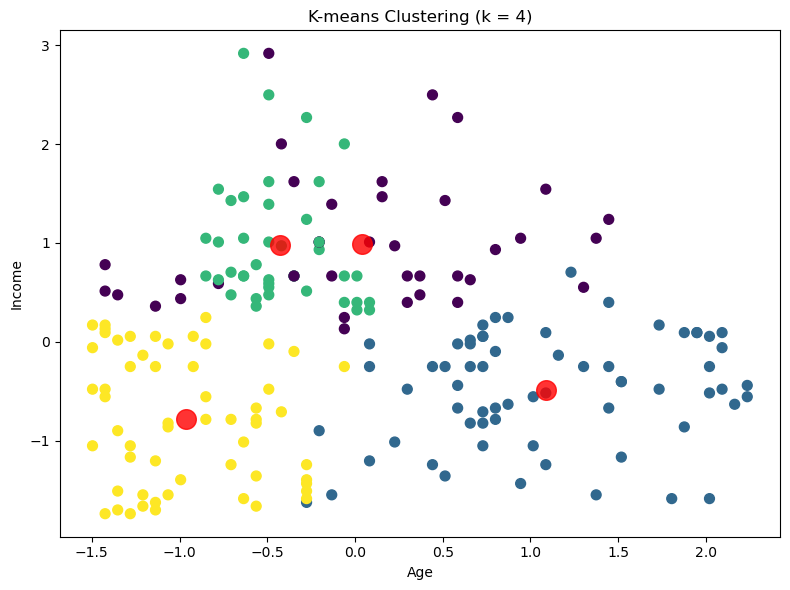

In [137]:
# Final graph for INCOME against AGE -->  KMEANS 

# 4 clusters
n_clusters = 4

# perform k-means clustering
model = KMeans(n_clusters=n_clusters).fit(dataset)
y_kmeans = model.predict(dataset)  # Get cluster assignments

# scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(dataset['Age'], dataset['Income'], c=y_kmeans, s=50, cmap='viridis')

# cluster centers
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)

# labels 
plt.xlabel('Age')
plt.ylabel('Income')
plt.title(f'K-means Clustering (k = {n_clusters})')

# plotting
plt.tight_layout()
plt.show()

# There are 4 clusters observed...

## 1) Younger people below the 25th lower quartile thereabout have lowest income compared to other clusters, this cluster is mainly teenagers who are not working yet.
## 2) People above the 50th upper quartile, which is roughly older adults / elderly, have slightly more income than the teenagers in general.
## 3) For the younger people aged in the 25th to 50th quartile thereabout, which are the young working adults, they generally have the highest income and are concentrated suggesting people at this age earns the most.
## 4) Lastly, the last cluster shows that below the 75th quartile in age, there are people who earn slightly more in general, but it is all spread out which shows the group of people who earn slightly more than the rest who are younger than the elderly.

#

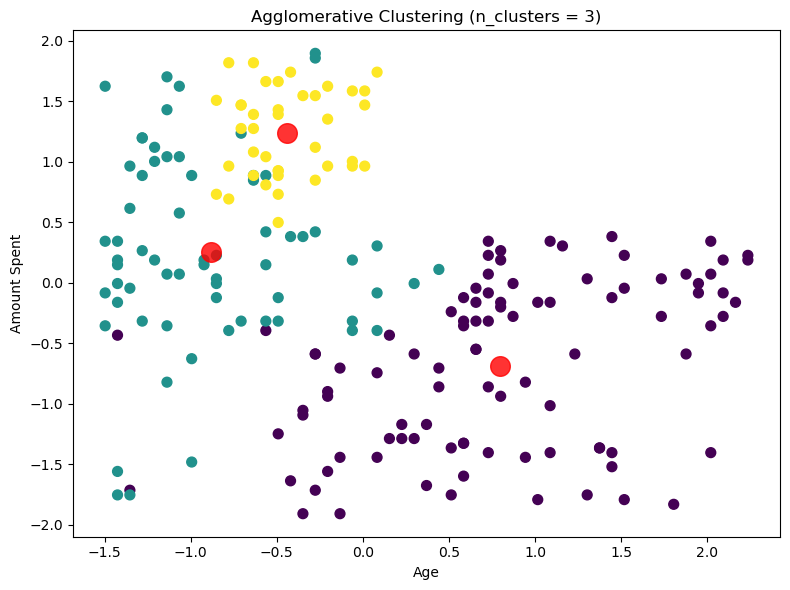

In [138]:
# Final graph for AMOUNT SPENT against AGE --> AGGLOMERATIVE

# 4 clusters
n_clusters = 3

# fit the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
labels = agg_clustering.fit_predict(dataset)

# scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(dataset['Age'], dataset['Amount Spent'], c=labels, s=50, cmap='viridis')

# plot cluster means
cluster_means = dataset.groupby(labels)[['Age', 'Amount Spent']].mean().values
plt.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, alpha=0.8)

# labels
plt.xlabel('Age')
plt.ylabel('Amount Spent')
plt.title(f'Agglomerative Clustering (n_clusters = {n_clusters})')

# plotting
plt.tight_layout()
plt.show()

# There are 3 cluster observed...

## 1) The first cluster is the older people, they generally all have a trend of not spending that much compared to the younger people like adults and teenagers.
## 2) The second cluster is for those aged in from the 0th to 25th quartile, and they spend significantly more than the elderly/older adults, this group is mainly teenagers..
## 3) The third cluster shows that in the 25th to 50th quartile, which is roughly working adult, spend the most and are concentrated in a cluster, suggesting almost all of adults spend more compared to other age groups.

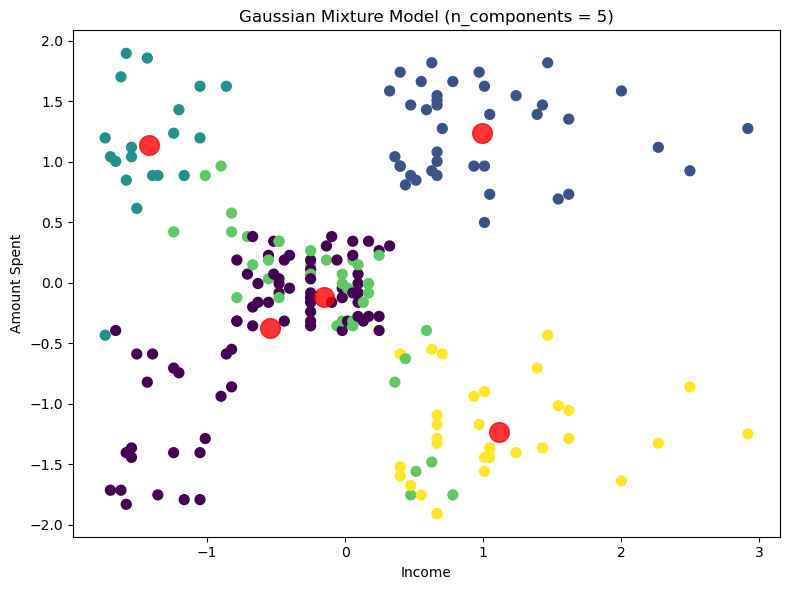

In [141]:
# Final grapph for AMOUNT SPENT against INCOME --> GMM

# 5 clusters
n_components = 5

# fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, random_state=42) # Added random state for reproducibility
gmm.fit(dataset)
labels = gmm.predict(dataset)

# scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(dataset['Income'], dataset['Amount Spent'], c=labels, s=50, cmap='viridis')

# plot cluster means (GMM doesn't have centers like k-means, but means are helpful)
cluster_means = dataset.groupby(labels)[['Income', 'Amount Spent']].mean().values
plt.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, alpha=0.8)

# labels 
plt.xlabel('Income')
plt.ylabel('Amount Spent')
plt.title(f'Gaussian Mixture Model (n_components = {n_components})')

# plotting
plt.tight_layout()
plt.show()

# Insights : 
## 1) First cluster is in the top left, shows cluster of people with low income yet high spending.
## 2) 2nd cluster is in the top right, shows people with high income and high spending. 
## 3) 3rd cluster is roughly in the center slightly overlapping to the bottom two clusters. This cluster shows the people with medium income spending the medium amount. 
## 4) 4th cluster is in the bottom right, it shows people with high income but low spending, suggests more well to do are saving more money. 
## 5) Last cluster is in bottom left to overlapping with center, shows cluster of people with incomes below the 50th quartile, suggests that there are both people who save and people who spend moderately with lower income.

#

# Conclusion : 

## Generally, there are many customers with various incomes, with medium aged working adults generally earning the most in the cluster. People aged in this cluster, also generally has the highest spending compared to clusters of teenagers and retired / older adults. However, when it comes to spending in relation to income, we can see that there are 3 very distinct spending habits. People of lower and higher income have either the habit of spending a lot or very little, whereas people of medium income spend the average amount of other clusters. 


#

# Linking back to the given context : 
## Since there are 3 ranges of customer spending : low, medium, high, the mall should have options in each aspect such as shopping, entertainment and food with varying prices according to the customer spending. Furthermore, people that spend more are generally the middle aged people (young adults), while the younger teenagers are the slightly more than average spenders with the elders / older adults being the more budget conscious spenders as they spend less. Seeing how patterns of spending are grouped, the cheaper options in the mall should be more suited for old people, while the moderately priced options should be more suited towards teenagers, and the higher priced options should be made to be more suited towards the young adults. The mall should also include a small amount of options in each category for all ages as there are other types of spenders as well despite their income.
